In [12]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


###PCA analysis and visualisation demo.

``Run time``: approximately ? minutes (workstation circa 2010)

``Memory requirement``: ~ ?GB


In [13]:
from tvb.simulator.lab import *
from tvb.datatypes.time_series import TimeSeriesRegion
from tvb.simulator.plot import timeseries_interactive as timeseries_interactive
from tvb.analyzers.pca import compute_pca

LOG = get_logger('demo')

In [14]:
#Load the demo region timeseries dataset 
try:
    data = numpy.load("demo_data_region_16s_2048Hz.npy")
except IOError:
    LOG.error("Can't load demo data. It will be created now running the generate_region_demo_data() function.")
    generate_region_demo_data()
    data = numpy.load("demo_data_region_16s_2048Hz.npy")


In [15]:
period = 0.00048828125  # s

In [16]:
#Put the data into a TimeSeriesRegion datatype
white_matter = connectivity.Connectivity.from_file()
tsr = TimeSeriesRegion(connectivity=white_matter,
                       data=data,
                       sample_period=period)
tsr.configure()

WARNING  File 'hemispheres' not found in ZIP.


In [17]:
#Create and run the analyser
pca_data = compute_pca(tsr)
pca_data.component_time_series = data

   INFO  weights shape will be: (76, 76, 1, 1)
   INFO  fractions shape will be: (76, 1, 1)


In [18]:
#Generate derived data, such as, component time series, etc.
pca_data.configure()


In [19]:
#Put the data into a TimeSeriesSurface datatype
component_tsr = TimeSeriesRegion(connectivity=white_matter,
                                 data=pca_data.component_time_series,
                                 sample_period=period)
component_tsr.configure()


<IPython.core.display.Javascript object>


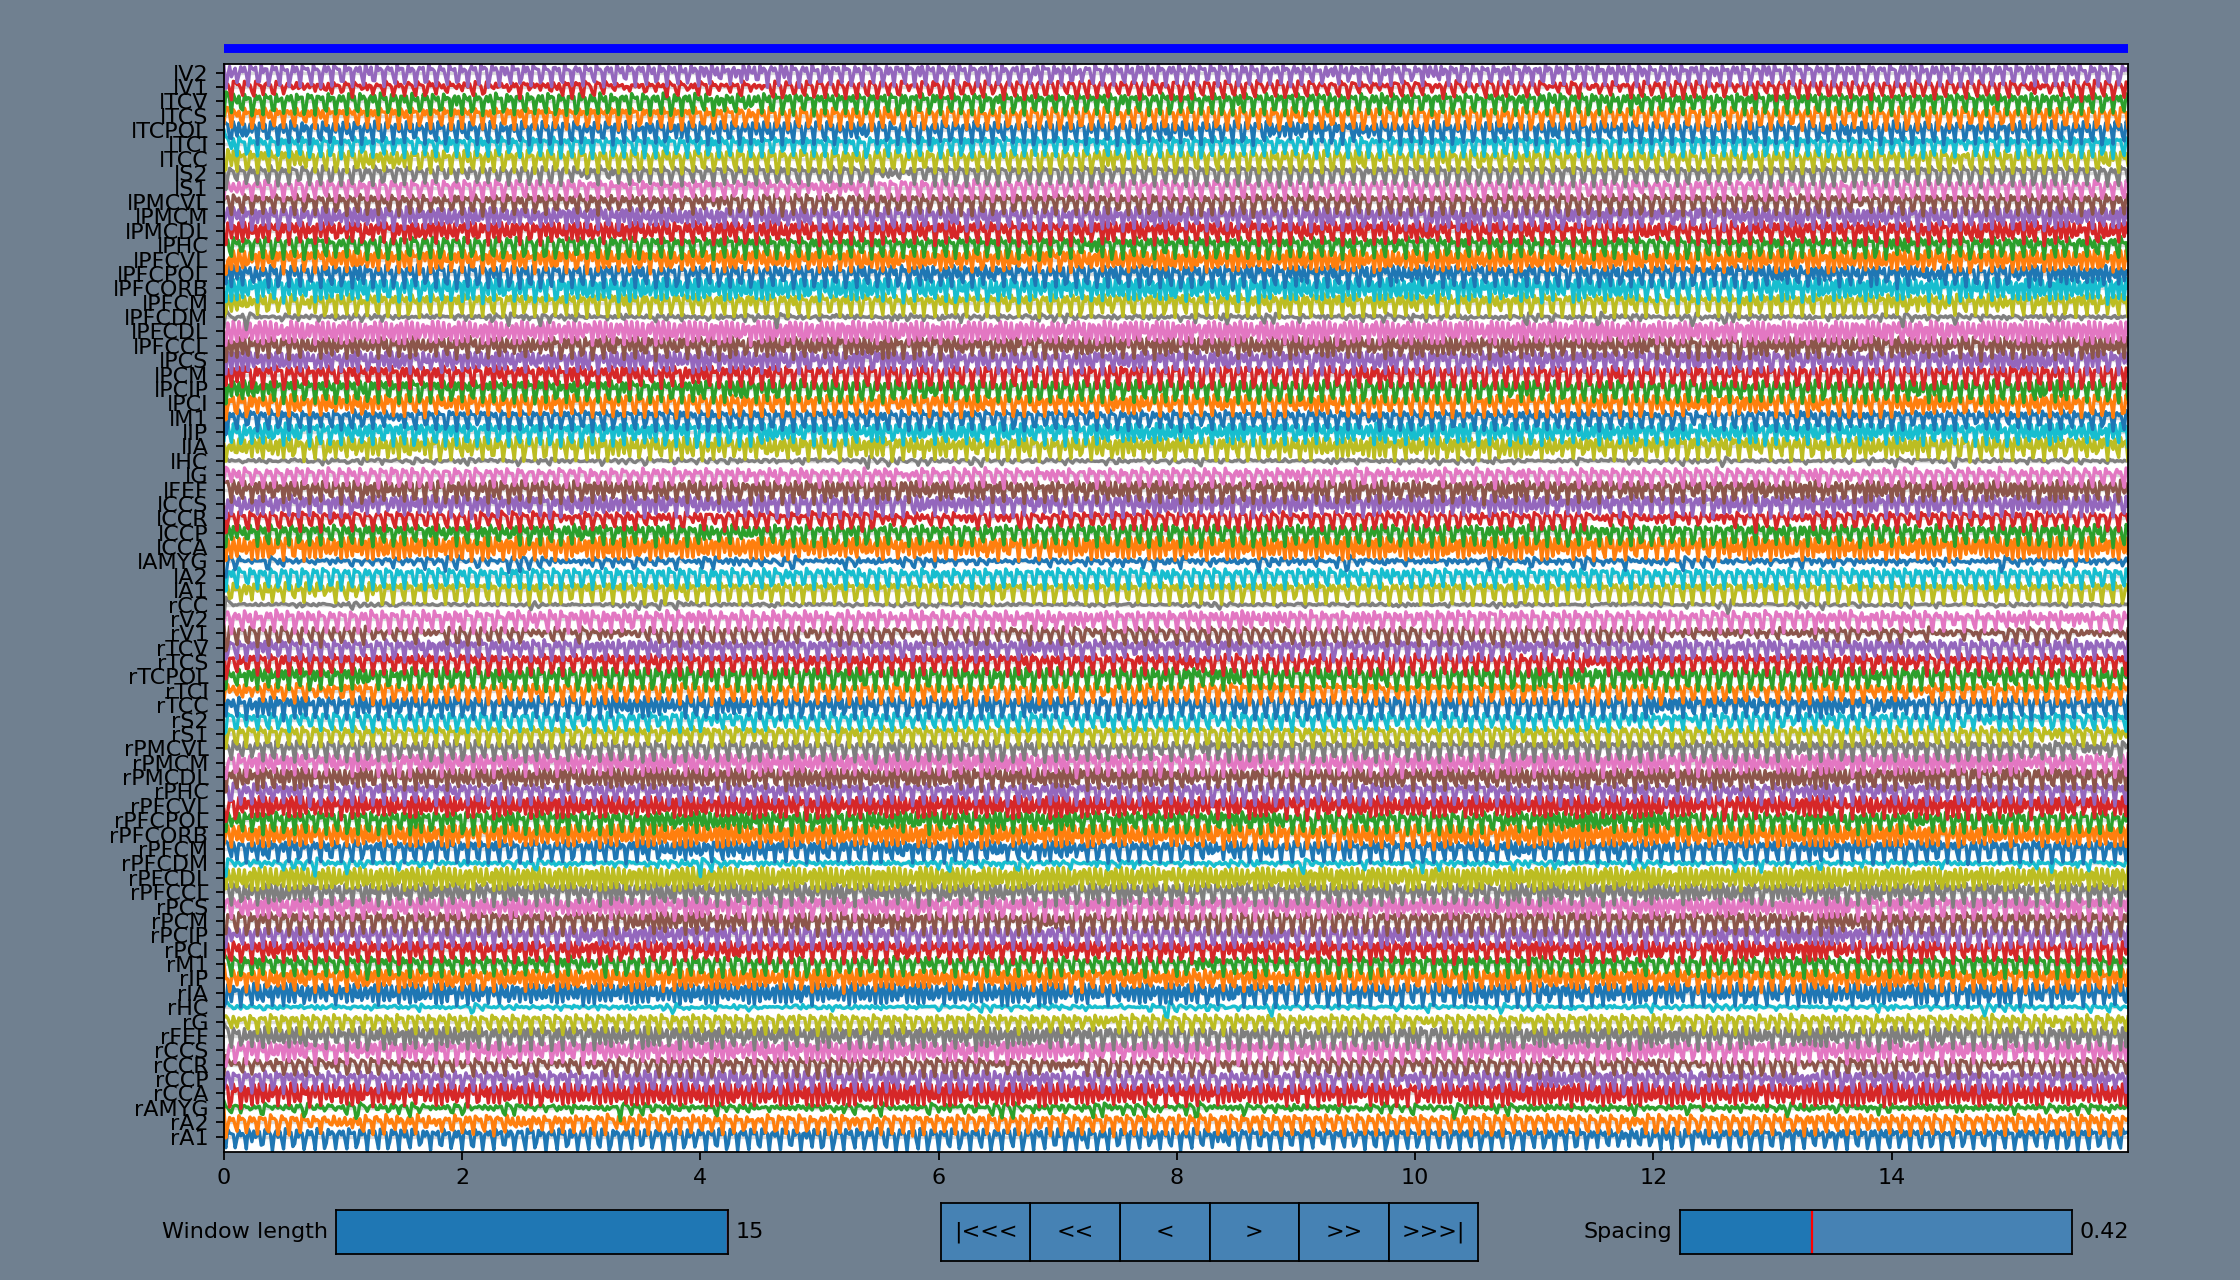

In [20]:
#Pretty pictures...
tsi = timeseries_interactive.TimeSeriesInteractive(time_series=component_tsr)
tsi.configure()
tsi.show()

<IPython.core.display.Javascript object>


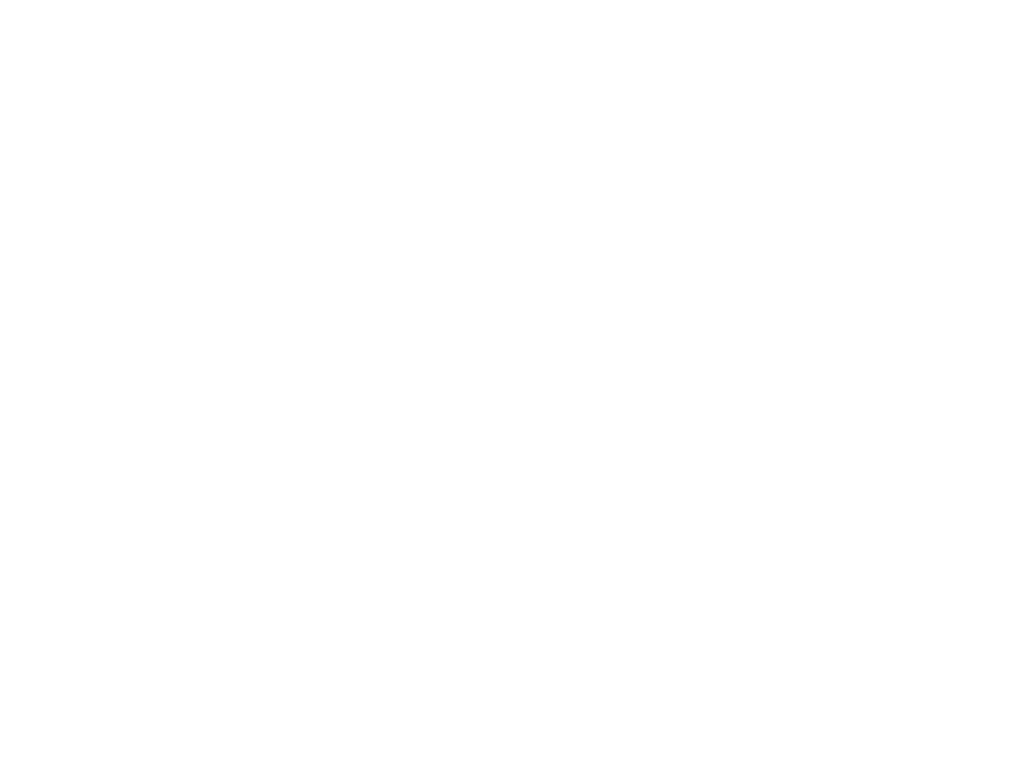

<IPython.core.display.Javascript object>


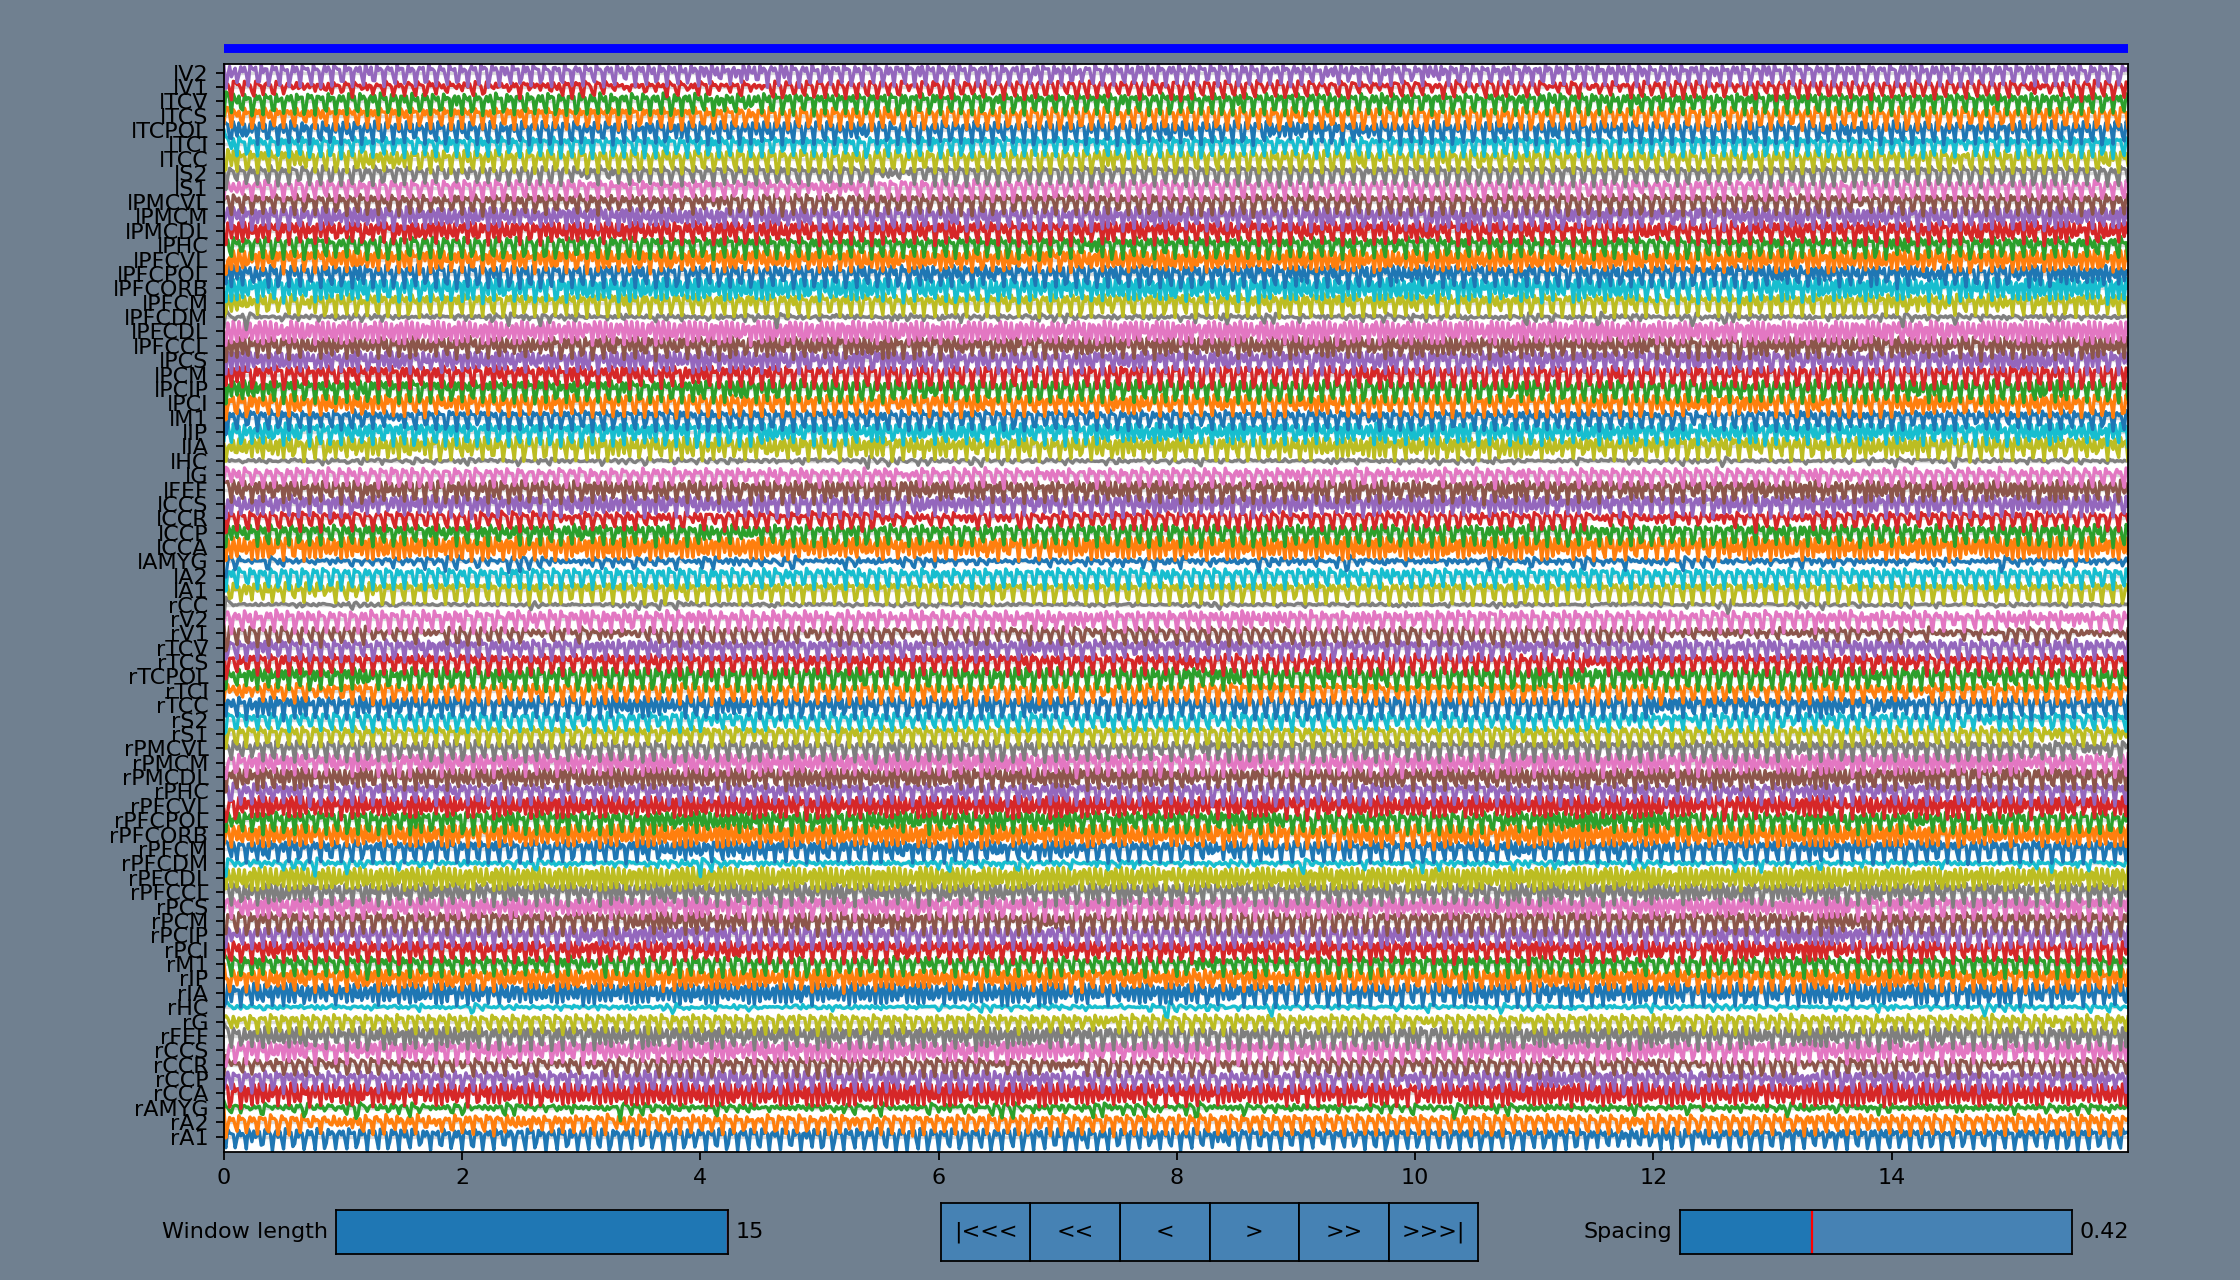

In [22]:
pylab.clf()
tsi = timeseries_interactive.TimeSeriesInteractive(time_series=tsr)
tsi.configure()
tsi.show()